<a href="https://colab.research.google.com/github/VishalSingh2610/Project2_of_Bharat_Intern/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Load Data from Local Directory**

In [43]:
from google.colab import files
uploaded = files.upload()

Saving HousePricePrediction.xlsx to HousePricePrediction (1).xlsx


# **Load Dataset**

In [44]:
dataset = pd.read_excel('HousePricePrediction.xlsx')
dataset.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


# **Summarize Dataset**

In [45]:
dataset.shape

(2919, 13)

# **Categorize Features depending upon their data-types**

In [46]:
obj = dataset.dtypes=='object'
object_cols = list(obj[obj].index)
print("The Categorical Variables :",len(object_cols))


int_ = dataset.dtypes=='int'
int_cols = list(int_[int_].index)
print("The Integer Variables :",len(int_cols))


flo_ = dataset.dtypes=='float'
flo_cols = list(flo_[flo_].index)
print("The Float Variables :",len(flo_cols))

The Categorical Variables : 4
The Integer Variables : 6
The Float Variables : 3


# **Exploratory Data Analysis by drawing HeatMap**

<ipython-input-47-fc726e37f824>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),cmap='BrBG',fmt = '.2f',linewidths = 2,annot = True)


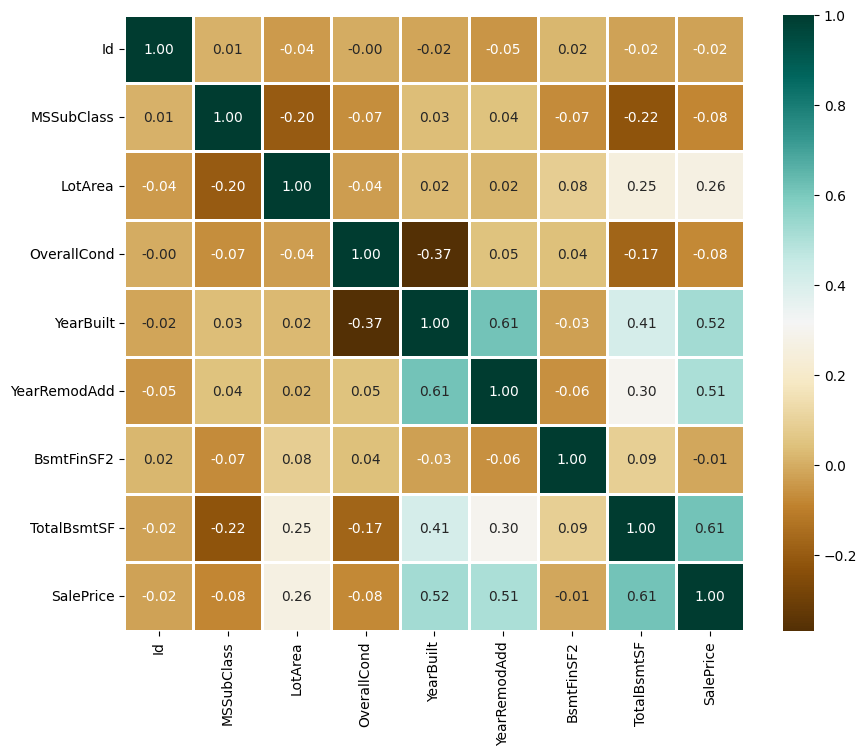

In [47]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(),cmap='BrBG',fmt = '.2f',linewidths = 2,annot = True)
plt.show()

# **To analyze the different categorical features. Let’s draw the barplot.**

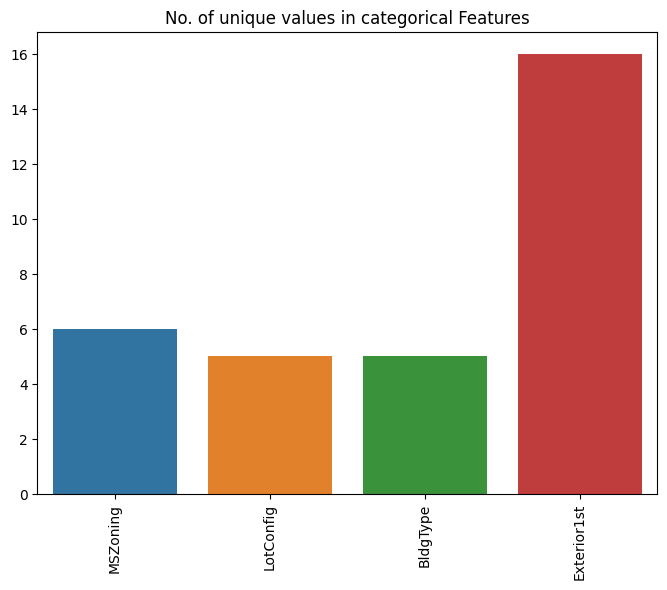

In [48]:
unique_values = []
for col in object_cols:
  unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(8,6))
plt.title("No. of unique values in categorical Features")
plt.xticks(rotation =90)
sns.barplot(x=object_cols,y=unique_values)
plt.show()

# **Findout the actual count of each category so plot barplot**

<ipython-input-49-ab3a9f2d2c9c>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(11,4,index)


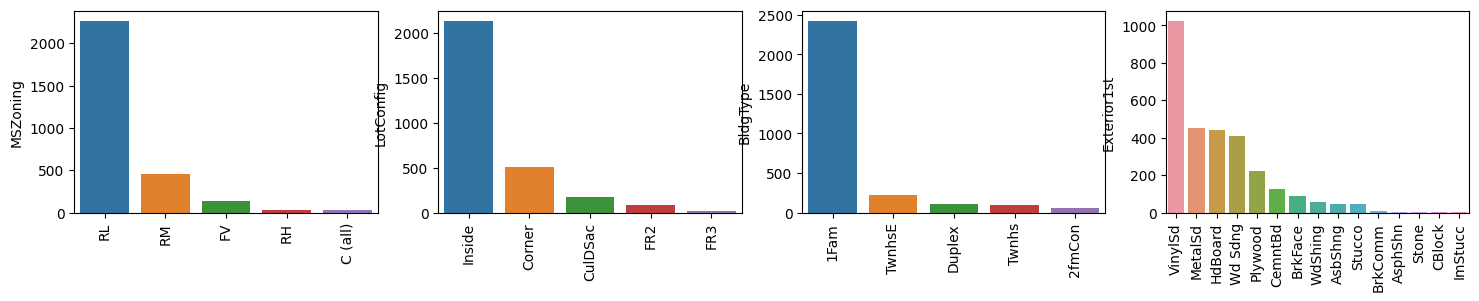

In [49]:
plt.figure(figsize=(18,34))
plt.title("Categorical Features: Distribution")
# plt.xticks(rotation=90)
index = 1

for col in object_cols:
  y = dataset[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x = list(y.index),y=y)
  index+=1
  # plt.show()
plt.show()

# **Data Cleaning :**
As we know Id column is not participating in prediction so drop it.

In [50]:
dataset = dataset.drop('Id',axis=1)
dataset.head()

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


### **Checking for Null values**

In [51]:
dataset.isna().sum()

MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

### **Replace SalesPrice empty values with Mean values**

In [55]:
dataset['SalePrice'] = dataset['SalePrice'].fillna(dataset['SalePrice'].mean())

### **Drop Records with Null Values**

In [56]:
new_dataset = dataset.dropna()

### **Checking new_dataset having null values or not**

In [57]:
new_dataset.isna().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

# **OneHotEncoder – For Label categorical features**

In [59]:
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical Variables:")
print(object_cols)
print("No. of Categorical variables:",len(object_cols))


Categorical Variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of Categorical variables: 4


### **Apply OneHotEncoding to the whole list**

In [67]:
enc = OneHotEncoder(sparse=True)

OH_cols = pd.DataFrame(enc.fit_transform(new_dataset[object_cols]).toarray())
OH_cols.index = new_dataset.index
OH_cols.columns = enc.get_feature_names_out(input_features=object_cols)
df_final = new_dataset.drop(object_cols,axis=1)
df_final = pd.concat([df_final,OH_cols],axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# **Segregation of Data into Dependent and Independent Variables**

In [69]:
X = df_final.drop('SalePrice',axis=1)
Y = df_final['SalePrice']

# **Splitting Dataset into Training and Testing**

In [84]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

# **SVM – Support vector Machine**

In [95]:
from sklearn import svm
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(x_train,y_train)
y_pred = model_SVR.predict(x_test)

print("The Mean Absolute Percentage Error: {0}".format(mean_absolute_percentage_error(y_pred,y_test)))

The Mean Absolute Percentage Error: 0.15945441496865861


# **Random Forest Regression**

In [97]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(x_train,y_train)
y_pred1 = model_RFR.predict(x_test)

print("The Mean Absolute Percentage Error: {0}".format(mean_absolute_percentage_error(y_pred1,y_test)))

The Mean Absolute Percentage Error: 0.16889951358632524


# **Linear Regression**

In [98]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(x_train,y_train)
y_pred2 = model_LR.predict(x_test)

print("The Mean Absolute Percentage Error: {0}".format(mean_absolute_percentage_error(y_pred2,y_test)))

The Mean Absolute Percentage Error: 0.17351381687806422


# **CatBoost Classifier**

In [ ]:
from catboost import CatBoostRegressor
model_cb = CatBoostRegressor()
model_cb.fit(x_train,y_train)

y_pred3 = model_cb.predict(x_test)

print("The Mean Absolute Percentage Error: {0}".format(mean_absolute_percentage_error(y_pred3,y_test)))